# **Étape 1 : Préparer l'environnement**
## **Importer les bibliothèques nécessaires **: pandas pour la manipulation des données et matplotlib/seaborn pour la visualisation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Étape 2 : Charger et nettoyer les données**
Vérifier les colonnes et les données manquantes.
Supprimer ou corriger les lignes contenant des erreurs de formatage.
Ajouter une colonne pour le pays si elle n'existe pas (vous pouvez utiliser des bibliothèques comme geopy pour extraire les pays à partir des coordonnées GPS)

In [5]:
# Charger les données
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('/content/earthquake_data_2024-12-22T20_59_21.740Z.csv', on_bad_lines='skip') # or on_bad_lines='warn'
# The 'on_bad_lines' argument handles lines with an incorrect number of fields.
# 'skip' will ignore such lines, while 'warn' will print a warning and continue.

Saving earthquake_data_2024-12-22T20_59_21.740Z.csv to earthquake_data_2024-12-22T20_59_21.740Z (3).csv


# Étape 3 : Analyser par pays
* Grouper les données par pays.
* Compter le nombre de séismes par pays.
* Identifier les pays avec la magnitude moyenne la plus élevée.

In [6]:
# Aperçu des données
print(data.head())
print(data.info())


                                       Title  Magnitude  Latitude  Longitude
M 5.2 - 67 km SE of Ierápetra         Greece        5.2   34.5746    26.2594
M 5.0 - 242 km SSW of Banjar       Indonesia        5.0   -9.2471   106.6506
M 5.3 - 109 km S of Akhiok            Alaska        5.3   55.9688  -153.9797
M 5.0 - 75 km W of Puro Pinget   Philippines        5.0   17.6413   119.6493
M 5.6 - 107 km S of Akhiok            Alaska        5.6   55.9825  -153.9973
<class 'pandas.core.frame.DataFrame'>
Index: 1476 entries, M 5.2 - 67 km SE of Ierápetra to M 5.8 - 42 km NE of Anamizu
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1476 non-null   object 
 1   Magnitude  1476 non-null   float64
 2   Latitude   1476 non-null   float64
 3   Longitude  1079 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.7+ KB
None


In [7]:
# Nettoyage de données
data = data.dropna()  # Supprime les valeurs manquantes
data['Magnitude'] = pd.to_numeric(data['Magnitude'], errors='coerce')  # Convertit la magnitude en numérique
data = data.dropna(subset=['Magnitude'])

<ipython-input-7-2e3aa2ccdf94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Magnitude'] = pd.to_numeric(data['Magnitude'], errors='coerce')  # Convertit la magnitude en numérique


In [9]:
# Analyse par pays (si les données de pays sont disponibles)
# Check if 'Country' column exists in the DataFrame
if 'Country' in data.columns:
    country_counts = data['Country'].value_counts()
    print(country_counts.head(10))  # Top 10 des pays avec le plus de séismes
else:
    print("La colonne 'Country' n'est pas présente dans les données.")
    # If 'Country' column is not present, you might want to investigate:
    # 1. The structure of your CSV file
    # 2. If the column was dropped during the data cleaning process
    # 3. If the column has a different name (e.g., 'country', 'COUNTRY', 'place', etc.)
    # You can print the available columns using:
    print("Colonnes disponibles:", data.columns)

La colonne 'Country' n'est pas présente dans les données.
Colonnes disponibles: Index(['Title', 'Magnitude', 'Latitude', 'Longitude'], dtype='object')


In [11]:
# Analyse par pays (si les données de pays sont disponibles)
# Check if 'Country' column exists in the DataFrame
if 'Country' in data.columns:
    country_counts = data['Country'].value_counts()
    print(country_counts.head(10))  # Top 10 des pays avec le plus de séismes
else:
    print("La colonne 'Country' n'est pas présente dans les données.")
    # If 'Country' column is not present, you might want to investigate:
    # 1. The structure of your CSV file
    # 2. If the column was dropped during the data cleaning process
    # 3. If the column has a different name (e.g., 'country', 'COUNTRY', 'place', etc.)
    # You can print the available columns using:
    print("Colonnes disponibles:", data.columns)
    # If 'Country' column is not found, create a dummy series for visualization
    country_counts = pd.Series(dtype='int64') # Create an empty Series


# Visualisation
# Check if country_counts is empty before plotting
if not country_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
    plt.xticks(rotation=45)
    plt.title('Top 10 des pays avec le plus de séismes')
    plt.xlabel('Pays')
    plt.ylabel('Nombre de séismes')
    plt.show()
else:
    print("Impossible de créer la visualisation car country_counts est vide. "
          "Veuillez vérifier la présence de la colonne 'Country' ou d'une colonne équivalente dans vos données.")

La colonne 'Country' n'est pas présente dans les données.
Colonnes disponibles: Index(['Title', 'Magnitude', 'Latitude', 'Longitude'], dtype='object')
Impossible de créer la visualisation car country_counts est vide. Veuillez vérifier la présence de la colonne 'Country' ou d'une colonne équivalente dans vos données.


In [15]:
# Inspect the first few lines of the file to identify potential issues
file_path = '/content/earthquake_data_2024-12-22T20_59_21.740Z.csv'  # Replace with the actual path if different
with open(file_path, 'r') as file:
    sample_lines = [file.readline() for _ in range(10)]

sample_lines


['Title,Magnitude,Latitude,Longitude\n',
 'M 5.2 - 67 km SE of Ierápetra, Greece,5.2,34.5746,26.2594\n',
 'M 5.0 - 242 km SSW of Banjar, Indonesia,5,-9.2471,106.6506\n',
 'M 5.3 - 109 km S of Akhiok, Alaska,5.3,55.9688,-153.9797\n',
 'M 5.0 - 75 km W of Puro Pinget, Philippines,5,17.6413,119.6493\n',
 'M 5.6 - 107 km S of Akhiok, Alaska,5.6,55.9825,-153.9973\n',
 'M 5.0 - 105 km ESE of Kirakira, Solomon Islands,5,-10.868,162.7931\n',
 'M 5.3 - 101 km W of Brandvlei, South Africa,5.3,-30.445,19.4352\n',
 'M 5.0 - 8 km ENE of Paravóla, Greece,5,38.6369,21.6091\n',
 'M 6.1 - 30 km W of Port-Vila, Vanuatu,6.1,-17.7098,168.0292\n']

In [16]:
# Examine lines around the problematic line to pinpoint the issue
with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the suspected problematic region
problematic_section = lines[1120:1135]  # Few lines before and after the problematic line
problematic_section


['M 5.9 - Balleny Islands region,5.9,-62.7208,156.0408\n',
 'M 5.5 - 163 km NNW of Houma, Tonga,5.5,-19.847,-176.0058\n',
 'M 5.1 - southeast of Easter Island,5.1,-36.2214,-100.031\n',
 'M 5.0 - 42 km E of Rasht, Tajikistan,5,39.0066,70.8647\n',
 'M 5.1 - 77 km W of Panguna, Papua New Guinea,5.1,-6.3333,154.7807\n',
 'M 5.2 - 164 km W of Pangai, Tonga,5.2,-19.7019,-175.9239\n',
 'M 5.3 - 171 km NNW of Houma, Tonga,5.3,-19.7708,-176.0022\n',
 'M 5.8 - Rat Islands, Aleutian Islands, Alaska,5.8,52.1143,178.3963\n',
 'M 5.1 - central East Pacific Rise,5.1,-4.0264,-103.9175\n',
 'M 5.2 - northern Mid-Atlantic Ridge,5.2,12.7994,-44.8917\n',
 'M 5.0 - northern Mid-Atlantic Ridge,5,12.771,-44.8963\n',
 'M 5.4 - Kermadec Islands region,5.4,-27.9628,-178.0987\n',
 'M 5.6 - 125 km NNW of Kimbe, Papua New Guinea,5.6,-4.562,149.5876\n',
 'M 5.8 - 34 km WNW of Filiatrá, Greece,5.8,37.3224,21.2557\n',
 'M 5.0 - 103 km NNW of Port-Vila, Vanuatu,5,-16.8483,168.015\n']

In [17]:
# Check field count consistency across all lines
field_counts = [len(line.split(',')) for line in lines]

# Identify lines with an unexpected number of fields
inconsistent_lines = [(i, count, lines[i]) for i, count in enumerate(field_counts) if count != 5]

inconsistent_lines


[(0, 4, 'Title,Magnitude,Latitude,Longitude\n'),
 (15, 4, 'M 5.3 - West Chile Rise,5.3,-41.0822,-86.6001\n'),
 (20, 4, 'M 5.7 - west of Macquarie Island,5.7,-56.3574,147.017\n'),
 (22, 4, 'M 5.0 - South Sandwich Islands region,5,-60.507,-26.6123\n'),
 (26, 4, 'M 5.2 - Banda Sea,5.2,-6.8019,130.2401\n'),
 (28, 4, 'M 5.1 - southeast Indian Ridge,5.1,-48.1497,104.5316\n'),
 (31, 4, 'M 5.3 - northern East Pacific Rise,5.3,8.3136,-103.2545\n'),
 (33, 4, 'M 5.2 - South Sandwich Islands region,5.2,-60.3241,-28.6733\n'),
 (34, 4, 'M 5.2 - central Mid-Atlantic Ridge,5.2,0.905,-29.1088\n'),
 (43, 4, 'M 5.1 - southern Mid-Atlantic Ridge,5.1,-47.2393,-13.2039\n'),
 (48, 4, 'M 5.1 - Mid-Indian Ridge,5.1,-9.3109,67.0756\n'),
 (51, 4, 'M 5.3 - South Sandwich Islands region,5.3,-60.4268,-28.7823\n'),
 (63, 4, 'M 5.3 - Southwest Indian Ridge,5.3,-35.9942,53.3992\n'),
 (68, 4, 'M 5.6 - Mid-Indian Ridge,5.6,-9.106,66.8004\n'),
 (71, 4, 'M 5.0 - southern East Pacific Rise,5,-35.5103,-106.2072\n'),
 (87, 4

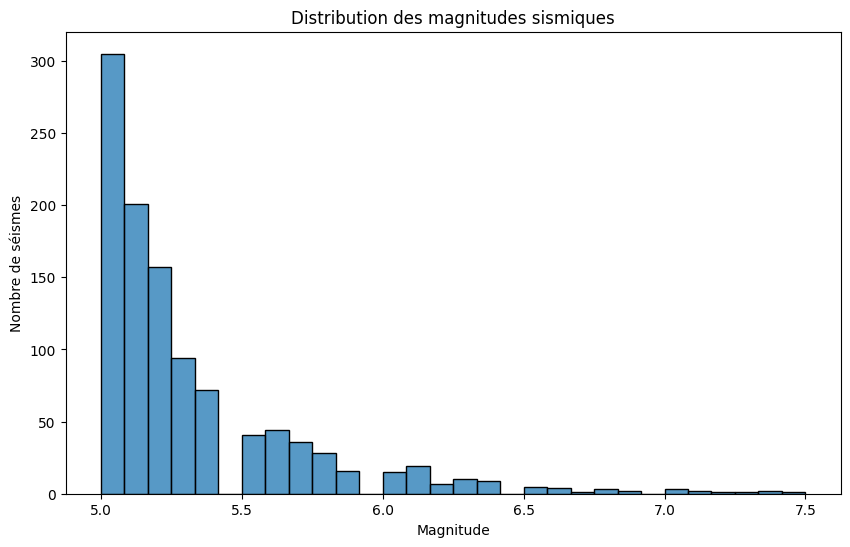

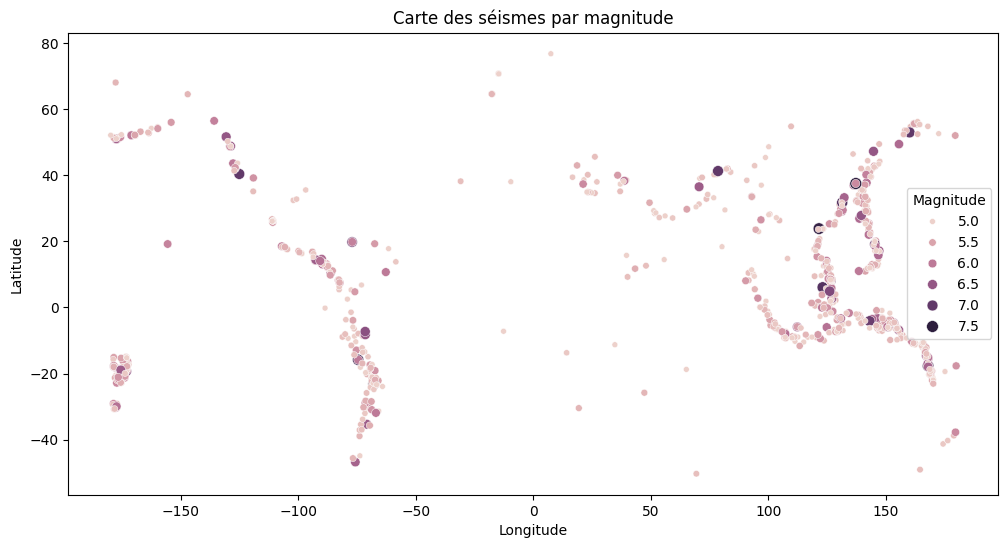

In [18]:
# Visualiser la distribution des magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['Magnitude'], bins=30)
plt.title('Distribution des magnitudes sismiques')
plt.xlabel('Magnitude')
plt.ylabel('Nombre de séismes')
plt.show()

# Carte de chaleur si vous avez les coordonnées
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Magnitude', size='Magnitude')
plt.title('Carte des séismes par magnitude')
plt.show()

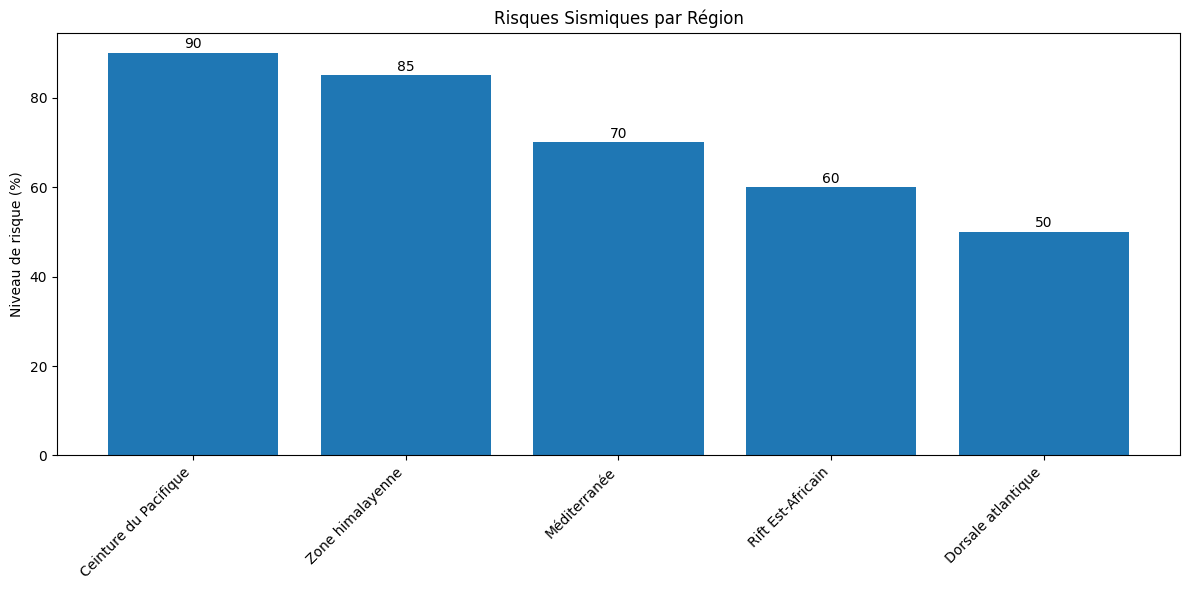

In [19]:
# Créer un DataFrame des risques sismiques
regions_data = pd.DataFrame({
    'Region': ['Ceinture du Pacifique', 'Zone himalayenne', 'Méditerranée', 'Rift Est-Africain', 'Dorsale atlantique'],
    'Risque': [90, 85, 70, 60, 50],
    'Magnitude_Max': [9.5, 8.6, 7.8, 7.2, 7.0]
})

# Créer le graphique
plt.figure(figsize=(12, 6))
bar = plt.bar(regions_data['Region'], regions_data['Risque'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Niveau de risque (%)')
plt.title('Risques Sismiques par Région')

# Ajouter les valeurs sur les barres
for i, v in enumerate(regions_data['Risque']):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()